## **IMI BIG DATA & AI CASE COMPETITION**

## *By: Hafsa, Cindy, Tahir & Albert*


# Initial Set-Up & Import Data <a class="anchor" id="1"></a>

In [1]:
# Import relevent Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import math

# Model Metrics & Data Pre-processing 
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Imbalance dataset methods
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Miscellaneous
from collections import Counter

# Additional Libraries -- Automatic Explanatory Data Analysis
from pandas_profiling import ProfileReport
from IPython.core.display import display, HTML

# Remove warnings (so it doesn't take up space)
import warnings
warnings.filterwarnings('ignore')

# Set seed for repition 
np.random.seed(2022)

/opt/homebrew/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/var/folders/hc/rv0ch5hn293cmmlwhw7w_drh0000gn/T/ipykernel_34963/2940248913.py:48: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# Some settings for making the tables, plots and the report look nicer
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 999)
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.container { length:100% !important; }</style>")) 

In [4]:
# Read in the data
# Canadian Companies Data
df1 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/Feature_Engineering_Completed_df1.xlsx")

# General Companies Data
df2 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/Feature_Engineering_Completed_df2.xlsx")

# Data Dictionary from Canadian Companies Dataset (Although both data dictionaries are the same) 
data_dictionary = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/cmeg_df_case_competition_scrambled_train.xlsx", sheet_name=1)

In [5]:
df1.head()

,Unnamed: 0,ROW,Corp_Residence_Country_Code,BR Code,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,TOTALEQUITY_Y2,TOTALEQUITY_Y3,TOTALNETWORTH_Y0,TOTALNETWORTH_Y1,TOTALNETWORTH_Y2,TOTALNETWORTH_Y3,CAPITALIZATION_Y0,CAPITALIZATION_Y1,CAPITALIZATION_Y2,CAPITALIZATION_Y3,TOTINTEXP_Y0,TOTINTEXP_Y1,TOTINTEXP_Y2,TOTINTEXP_Y3,LEASERENTEXP_Y0,LEASERENTEXP_Y1,LEASERENTEXP_Y2,LEASERENTEXP_Y3,EBITDAR_Y0,EBITDAR_Y1,EBITDAR_Y2,EBITDAR_Y3,receivabledays_Y0,receivabledays_Y1,receivabledays_Y2,receivabledays_Y3,INVENTORYDAYS_Y0,INVENTORYDAYS_Y1,INVENTORYDAYS_Y2,INVENTORYDAYS_Y3,payableDAYS_Y0,payableDAYS_Y1,payableDAYS_Y2,payableDAYS_Y3,Capex2Dep_Y0,Capex2Dep_Y1,Capex2Dep_Y2,tangibleNetWorth_Y0,tangibleNetWorth_Y1,tangibleNetWorth_Y2,tangibleNetWorth_Y3,FIXEDCHARGECOV_Y0,FIXEDCHARGECOV_Y1,FIXEDCHARGECOV_Y2,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3,Date,Year,Month,missing_data_flag,EBITDA_3YearAverage,TOTALASSET_3YearAverage,TOTALDEBT_3YearAverage,TOTALREVENUE_3YearAverage,CURRENTASSET_3YearAverage,FIXEDASSET_3YearAverage,CURRENTLIABILITY_3YearAverage,NONCURRLIA_3YearAverage,TOTALEQUITY_3YearAverage,TOTALNETWORTH_3YearAverage,CAPITALIZATION_3YearAverage,TOTINTEXP_3YearAverage,LEASERENTEXP_3YearAverage,EBITDAR_3YearAverage,receivabledays_3YearAverage,INVENTORYDAYS_3YearAverage,payableDAYS_3YearAverage,Capex2Dep_3YearAverage,tangibleNetWorth_3YearAverage,FIXEDCHARGECOV_3YearAverage,DEBTSERVCOV_3YearAverage,NETPROFIT_3YearAverage,NETSALES_3YearAverage,ASSETTURNOVER_3YearAverage,OPERPROFIT_3YearAverage,ARTurnover_3YearAverage,Inventory_3YearAverage,RETAINED_EARNINGS_3YearAverage,FCF_3YearAverage,CCE_3YearAverage,Total_Leverage_Y0,Total_Leverage_Y1,Total_Leverage_Y2,Total_Leverage_Y3,Ebitda_Margin_Y0,Ebitda_Margin_Y1,Ebitda_Margin_Y2,Ebitda_Margin_Y3,Operating_Margin_Y0,Operating_Margin_Y1,Operating_Margin_Y2,Operating_Margin_Y3,Interest_CR_Y0,Interest_CR_Y1,Interest_CR_Y2,Interest_CR_Y3,Growth_Y3_to_Y2,Growth_Y2_to_Y1,Average_Growth,Current_Ratio_Y0,Current_Ratio_Y1,Current_Ratio_Y2,Current_Ratio_Y3,Quick_Ratio_Y0,Quick_Ratio_Y1,Quick_Ratio_Y2,Quick_Ratio_Y3,Debt_Ratio_Y0,Debt_Ratio_Y1,Debt_Ratio_Y2,Debt_Ratio_Y3,Return_Net_Sales_Y0,Return_Net_Sales_Y1,Return_Net_Sales_Y2,Return_Net_Sales_Y3,Average_Total_Assets,Asset_Turnover_Y0,Asset_Turnover_Y1,Asset_Turnover_Y2,Asset_Turnover_Y3
0,0,5662,1,5,1576,5,1,575863.911214,602838.635998,583646.469630,614602.866245,619611.510181,621095.725446,611355.907673,582433.004400,623105.791017,596800.177680,600460.033208,598408.339905,611355.411490,589592.109008,605336.777910,574789.603998,620745.952718,621004.600446,614991.732391,604478.517167,609095.636450,600147.701765,589971.619360,580405.105567,578103.988392,577109.531117,574090.626783,583030.371565,600890.935743,604975.472270,600103.052065,601804.995337,596259.219747,573227.115787,572126.125957,601814.939331,578045.252633,571339.795861,596653.190112,590035.602606,571736.508285,628719.211745,584338.549368,616858.074405,611986.404942,604922.163814,577051.576457,613092.388218,603141.577521,5766

In [11]:
df2.head(100)

,Unnamed: 0,ROW,Corp_Residence_Country_Code,BR Code,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,TOTALEQUITY_Y2,TOTALEQUITY_Y3,TOTALNETWORTH_Y0,TOTALNETWORTH_Y1,TOTALNETWORTH_Y2,TOTALNETWORTH_Y3,CAPITALIZATION_Y0,CAPITALIZATION_Y1,CAPITALIZATION_Y2,CAPITALIZATION_Y3,TOTINTEXP_Y0,TOTINTEXP_Y1,TOTINTEXP_Y2,TOTINTEXP_Y3,LEASERENTEXP_Y0,LEASERENTEXP_Y1,LEASERENTEXP_Y2,LEASERENTEXP_Y3,EBITDAR_Y0,EBITDAR_Y1,EBITDAR_Y2,EBITDAR_Y3,receivabledays_Y0,receivabledays_Y1,receivabledays_Y2,receivabledays_Y3,INVENTORYDAYS_Y0,INVENTORYDAYS_Y1,INVENTORYDAYS_Y2,INVENTORYDAYS_Y3,payableDAYS_Y0,payableDAYS_Y1,payableDAYS_Y2,payableDAYS_Y3,Capex2Dep_Y0,Capex2Dep_Y1,Capex2Dep_Y2,tangibleNetWorth_Y0,tangibleNetWorth_Y1,tangibleNetWorth_Y2,tangibleNetWorth_Y3,FIXEDCHARGECOV_Y0,FIXEDCHARGECOV_Y1,FIXEDCHARGECOV_Y2,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,INVENTORY_Y0,INVENTORY_Y1,INVENTORY_Y2,INVENTORY_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3,Date,Year,Month,missing_data_flag,EBITDA_3YearAverage,TOTALASSET_3YearAverage,TOTALDEBT_3YearAverage,TOTALREVENUE_3YearAverage,CURRENTASSET_3YearAverage,FIXEDASSET_3YearAverage,CURRENTLIABILITY_3YearAverage,NONCURRLIA_3YearAverage,TOTALEQUITY_3YearAverage,TOTALNETWORTH_3YearAverage,CAPITALIZATION_3YearAverage,TOTINTEXP_3YearAverage,LEASERENTEXP_3YearAverage,EBITDAR_3YearAverage,receivabledays_3YearAverage,INVENTORYDAYS_3YearAverage,payableDAYS_3YearAverage,Capex2Dep_3YearAverage,tangibleNetWorth_3YearAverage,FIXEDCHARGECOV_3YearAverage,DEBTSERVCOV_3YearAverage,NETPROFIT_3YearAverage,NETSALES_3YearAverage,ASSETTURNOVER_3YearAverage,OPERPROFIT_3YearAverage,ARTurnover_3YearAverage,INVENTORY_3YearAverage,RETAINED_EARNINGS_3YearAverage,FCF_3YearAverage,CCE_3YearAverage,Total_Leverage_Y0,Total_Leverage_Y1,Total_Leverage_Y2,Total_Leverage_Y3,Ebitda_Margin_Y0,Ebitda_Margin_Y1,Ebitda_Margin_Y2,Ebitda_Margin_Y3,Operating_Margin_Y0,Operating_Margin_Y1,Operating_Margin_Y2,Operating_Margin_Y3,Interest_CR_Y0,Interest_CR_Y1,Interest_CR_Y2,Interest_CR_Y3,Growth_Y3_to_Y2,Growth_Y2_to_Y1,Average_Growth,Current_Ratio_Y0,Current_Ratio_Y1,Current_Ratio_Y2,Current_Ratio_Y3,Quick_Ratio_Y0,Quick_Ratio_Y1,Quick_Ratio_Y2,Quick_Ratio_Y3,Debt_Ratio_Y0,Debt_Ratio_Y1,Debt_Ratio_Y2,Debt_Ratio_Y3,Return_Net_Sales_Y0,Return_Net_Sales_Y1,Return_Net_Sales_Y2,Return_Net_Sales_Y3,Average_Total_Assets,Asset_Turnover_Y0,Asset_Turnover_Y1,Asset_Turnover_Y2,Asset_Turnover_Y3
0,0,28464,2,4,8228,8,1,365604.767017,341575.264490,368053.254720,370696.187829,3.706175e+05,3.497885e+05,3.485696e+05,3.757753e+05,375510.954405,372600.077528,360644.686054,373539.595801,3.560748e+05,3.633396e+05,3.585169e+05,3.715991e+05,3.434351e+05,3.449771e+05,3.671623e+05,3.499458e+05,3.784293e+05,3.720962e+05,3.688327e+05,3.472348e+05,355541.904130,3.674396e+05,3.404340e+05,367150.907129,353405.890207,355716.993127,353085.838690,340960.105507,3.533652e+05,3.479149e+05,3.692967e+05,3.636268e+05,3.700049e+05,3.514704e+05,3.668692e+05,3.436602e+05,3.697346e+05,3.551172e+05,3.435738e+05,3.563240e+05,370169.540410,344003.480397,369171.604555,367363.465248,370634.594885,374281.413522,363411.986740,36205

In [10]:
# Starting off with 200 columns, of all cleaned up data
df1.shape

(28224, 199)

### Feature Selection with XGBoost

In [12]:
data1 = df1.copy(deep=True)
data2 = df2.copy(deep=True)

In [13]:
from numpy import sort
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [14]:
#data1 = df1.copy()
non_financial_features = ['ROW','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date', 'Unnamed: 0', 'missing_data_flag' ]
financial_features = data1.drop(non_financial_features, axis=1)
fin_features_lst = list(financial_features.columns)

In [15]:
def Standardize(xtrain, xtest, method):
    """ The following function takes in the given dataset, and standardizes it based on the given method."""
    
    if method == "Gaussian":
        std_scaler = StandardScaler()
        std_scaler.fit_transform(xtrain)
        std_scaler.transform(xtest)

    if method == "Normalize":
        norm_scaler = MinMaxScaler()
        norm_scaler.fit_transform(xtrain)
        norm_scaler.transform(xtest)
        
    if method == "Robust":
        robust_scaler = RobustScaler()
        robust_scaler.fit_transform(xtrain)
        robust_scaler.fit_transform(xtest)
        
    return xtrain, xtest 

In [16]:
df1.head()

,Unnamed: 0,ROW,Corp_Residence_Country_Code,BR Code,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,TOTALEQUITY_Y2,TOTALEQUITY_Y3,TOTALNETWORTH_Y0,TOTALNETWORTH_Y1,TOTALNETWORTH_Y2,TOTALNETWORTH_Y3,CAPITALIZATION_Y0,CAPITALIZATION_Y1,CAPITALIZATION_Y2,CAPITALIZATION_Y3,TOTINTEXP_Y0,TOTINTEXP_Y1,TOTINTEXP_Y2,TOTINTEXP_Y3,LEASERENTEXP_Y0,LEASERENTEXP_Y1,LEASERENTEXP_Y2,LEASERENTEXP_Y3,EBITDAR_Y0,EBITDAR_Y1,EBITDAR_Y2,EBITDAR_Y3,receivabledays_Y0,receivabledays_Y1,receivabledays_Y2,receivabledays_Y3,INVENTORYDAYS_Y0,INVENTORYDAYS_Y1,INVENTORYDAYS_Y2,INVENTORYDAYS_Y3,payableDAYS_Y0,payableDAYS_Y1,payableDAYS_Y2,payableDAYS_Y3,Capex2Dep_Y0,Capex2Dep_Y1,Capex2Dep_Y2,tangibleNetWorth_Y0,tangibleNetWorth_Y1,tangibleNetWorth_Y2,tangibleNetWorth_Y3,FIXEDCHARGECOV_Y0,FIXEDCHARGECOV_Y1,FIXEDCHARGECOV_Y2,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3,Date,Year,Month,missing_data_flag,EBITDA_3YearAverage,TOTALASSET_3YearAverage,TOTALDEBT_3YearAverage,TOTALREVENUE_3YearAverage,CURRENTASSET_3YearAverage,FIXEDASSET_3YearAverage,CURRENTLIABILITY_3YearAverage,NONCURRLIA_3YearAverage,TOTALEQUITY_3YearAverage,TOTALNETWORTH_3YearAverage,CAPITALIZATION_3YearAverage,TOTINTEXP_3YearAverage,LEASERENTEXP_3YearAverage,EBITDAR_3YearAverage,receivabledays_3YearAverage,INVENTORYDAYS_3YearAverage,payableDAYS_3YearAverage,Capex2Dep_3YearAverage,tangibleNetWorth_3YearAverage,FIXEDCHARGECOV_3YearAverage,DEBTSERVCOV_3YearAverage,NETPROFIT_3YearAverage,NETSALES_3YearAverage,ASSETTURNOVER_3YearAverage,OPERPROFIT_3YearAverage,ARTurnover_3YearAverage,Inventory_3YearAverage,RETAINED_EARNINGS_3YearAverage,FCF_3YearAverage,CCE_3YearAverage,Total_Leverage_Y0,Total_Leverage_Y1,Total_Leverage_Y2,Total_Leverage_Y3,Ebitda_Margin_Y0,Ebitda_Margin_Y1,Ebitda_Margin_Y2,Ebitda_Margin_Y3,Operating_Margin_Y0,Operating_Margin_Y1,Operating_Margin_Y2,Operating_Margin_Y3,Interest_CR_Y0,Interest_CR_Y1,Interest_CR_Y2,Interest_CR_Y3,Growth_Y3_to_Y2,Growth_Y2_to_Y1,Average_Growth,Current_Ratio_Y0,Current_Ratio_Y1,Current_Ratio_Y2,Current_Ratio_Y3,Quick_Ratio_Y0,Quick_Ratio_Y1,Quick_Ratio_Y2,Quick_Ratio_Y3,Debt_Ratio_Y0,Debt_Ratio_Y1,Debt_Ratio_Y2,Debt_Ratio_Y3,Return_Net_Sales_Y0,Return_Net_Sales_Y1,Return_Net_Sales_Y2,Return_Net_Sales_Y3,Average_Total_Assets,Asset_Turnover_Y0,Asset_Turnover_Y1,Asset_Turnover_Y2,Asset_Turnover_Y3
0,0,5662,1,5,1576,5,1,575863.911214,602838.635998,583646.469630,614602.866245,619611.510181,621095.725446,611355.907673,582433.004400,623105.791017,596800.177680,600460.033208,598408.339905,611355.411490,589592.109008,605336.777910,574789.603998,620745.952718,621004.600446,614991.732391,604478.517167,609095.636450,600147.701765,589971.619360,580405.105567,578103.988392,577109.531117,574090.626783,583030.371565,600890.935743,604975.472270,600103.052065,601804.995337,596259.219747,573227.115787,572126.125957,601814.939331,578045.252633,571339.795861,596653.190112,590035.602606,571736.508285,628719.211745,584338.549368,616858.074405,611986.404942,604922.163814,577051.576457,613092.388218,603141.577521,5766

In [17]:
df1.pop("Unnamed: 0")
df2.pop("Unnamed: 0")
print(" ")

0            0
1            1
2            2
3            3
4            4
         ...  
28459    28459
28460    28460
28461    28461
28462    28462
28463    28463
Name: Unnamed: 0, Length: 28464, dtype: int64

In [18]:
df1.shape

(28224, 198)

In [22]:
df1.dtypes

ROW                                        int64
Corp_Residence_Country_Code                int64
BR Code                                    int64
CUSTOMER_ID                                int64
Final_IG                                   int64
EBITDA_Y0                                float64
EBITDA_Y1                                float64
EBITDA_Y2                                float64
EBITDA_Y3                                float64
TOTALASSET_Y0                            float64
TOTALASSET_Y1                            float64
TOTALASSET_Y2                            float64
TOTALASSET_Y3                            float64
TOTALDEBT_Y0                             float64
TOTALDEBT_Y1                             float64
TOTALDEBT_Y2                             float64
TOTALDEBT_Y3                             float64
TOTALREVENUE_Y0                          float64
TOTALREVENUE_Y1                          float64
TOTALREVENUE_Y2                          float64
TOTALREVENUE_Y3     

In [33]:
data1.head()

,Unnamed: 0,ROW,Corp_Residence_Country_Code,BR Code,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,TOTALEQUITY_Y2,TOTALEQUITY_Y3,TOTALNETWORTH_Y0,TOTALNETWORTH_Y1,TOTALNETWORTH_Y2,TOTALNETWORTH_Y3,CAPITALIZATION_Y0,CAPITALIZATION_Y1,CAPITALIZATION_Y2,CAPITALIZATION_Y3,TOTINTEXP_Y0,TOTINTEXP_Y1,TOTINTEXP_Y2,TOTINTEXP_Y3,LEASERENTEXP_Y0,LEASERENTEXP_Y1,LEASERENTEXP_Y2,LEASERENTEXP_Y3,EBITDAR_Y0,EBITDAR_Y1,EBITDAR_Y2,EBITDAR_Y3,receivabledays_Y0,receivabledays_Y1,receivabledays_Y2,receivabledays_Y3,INVENTORYDAYS_Y0,INVENTORYDAYS_Y1,INVENTORYDAYS_Y2,INVENTORYDAYS_Y3,payableDAYS_Y0,payableDAYS_Y1,payableDAYS_Y2,payableDAYS_Y3,Capex2Dep_Y0,Capex2Dep_Y1,Capex2Dep_Y2,tangibleNetWorth_Y0,tangibleNetWorth_Y1,tangibleNetWorth_Y2,tangibleNetWorth_Y3,FIXEDCHARGECOV_Y0,FIXEDCHARGECOV_Y1,FIXEDCHARGECOV_Y2,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3,Date,Year,Month,missing_data_flag,EBITDA_3YearAverage,TOTALASSET_3YearAverage,TOTALDEBT_3YearAverage,TOTALREVENUE_3YearAverage,CURRENTASSET_3YearAverage,FIXEDASSET_3YearAverage,CURRENTLIABILITY_3YearAverage,NONCURRLIA_3YearAverage,TOTALEQUITY_3YearAverage,TOTALNETWORTH_3YearAverage,CAPITALIZATION_3YearAverage,TOTINTEXP_3YearAverage,LEASERENTEXP_3YearAverage,EBITDAR_3YearAverage,receivabledays_3YearAverage,INVENTORYDAYS_3YearAverage,payableDAYS_3YearAverage,Capex2Dep_3YearAverage,tangibleNetWorth_3YearAverage,FIXEDCHARGECOV_3YearAverage,DEBTSERVCOV_3YearAverage,NETPROFIT_3YearAverage,NETSALES_3YearAverage,ASSETTURNOVER_3YearAverage,OPERPROFIT_3YearAverage,ARTurnover_3YearAverage,Inventory_3YearAverage,RETAINED_EARNINGS_3YearAverage,FCF_3YearAverage,CCE_3YearAverage,Total_Leverage_Y0,Total_Leverage_Y1,Total_Leverage_Y2,Total_Leverage_Y3,Ebitda_Margin_Y0,Ebitda_Margin_Y1,Ebitda_Margin_Y2,Ebitda_Margin_Y3,Operating_Margin_Y0,Operating_Margin_Y1,Operating_Margin_Y2,Operating_Margin_Y3,Interest_CR_Y0,Interest_CR_Y1,Interest_CR_Y2,Interest_CR_Y3,Growth_Y3_to_Y2,Growth_Y2_to_Y1,Average_Growth,Current_Ratio_Y0,Current_Ratio_Y1,Current_Ratio_Y2,Current_Ratio_Y3,Quick_Ratio_Y0,Quick_Ratio_Y1,Quick_Ratio_Y2,Quick_Ratio_Y3,Debt_Ratio_Y0,Debt_Ratio_Y1,Debt_Ratio_Y2,Debt_Ratio_Y3,Return_Net_Sales_Y0,Return_Net_Sales_Y1,Return_Net_Sales_Y2,Return_Net_Sales_Y3,Average_Total_Assets,Asset_Turnover_Y0,Asset_Turnover_Y1,Asset_Turnover_Y2,Asset_Turnover_Y3
0,0,5662,1,5,1576,5,1,575863.911214,602838.635998,583646.469630,614602.866245,619611.510181,621095.725446,611355.907673,582433.004400,623105.791017,596800.177680,600460.033208,598408.339905,611355.411490,589592.109008,605336.777910,574789.603998,620745.952718,621004.600446,614991.732391,604478.517167,609095.636450,600147.701765,589971.619360,580405.105567,578103.988392,577109.531117,574090.626783,583030.371565,600890.935743,604975.472270,600103.052065,601804.995337,596259.219747,573227.115787,572126.125957,601814.939331,578045.252633,571339.795861,596653.190112,590035.602606,571736.508285,628719.211745,584338.549368,616858.074405,611986.404942,604922.163814,577051.576457,613092.388218,603141.577521,5766

In [34]:
df1 = data1

In [35]:
df1 = df1.reset_index()

In [32]:
df1_target = df1.pop("B_PLUS_FLAG")
df2_target = df2.pop("B_PLUS_FLAG")

# Df1 first 
all_features = df1[fin_features_lst]
all_targets = df1_target
X_train, X_test, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.20)

# Standardize our data
train_features, test_features = Standardize(X_train, X_test, method ="Normalize" )

KeyError: 'B_PLUS_FLAG'

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(train_features, train_targets)
# plot feature importance
plot_importance(model)
pyplot.show()

## Correlation & Co-variance - Pearsons, Spearmans, Non-Linear Co-relations<a class="anchor" id="4.2"></a>

In [ ]:
# Gather train and test sets to work with

from sklearn.model_selection import train_test_split

X1 = df1.loc[:, ~df1_simple.columns.isin(['Final_IG', 'B_PLUS_FLAG', 'ROW','Corp_Residence_Country_Code','BR Code','Period','CUSTOMER_ID','Final_IG','B_PLUS_FLAG'])]
y1 = df1['B_PLUS_FLAG']

normalized_X1=(X1-X1.min())/(X1.max()-X1.min())

X1_train, X1_test, y1_train, y1_test = train_test_split(normalized_X1, y1, test_size=0.2, random_state=0)

X2 = df2.loc[:, ~df2_simple.columns.isin(['Final_IG', 'B_PLUS_FLAG', 'ROW','Corp_Residence_Country_Code','BR Code','Period','CUSTOMER_ID','Final_IG','B_PLUS_FLAG'])]
y2 = df2['B_PLUS_FLAG']

normalized_X2=(X2-X2.min())/(X2.max()-X2.min())

X2_train, X2_test, y2_train, y2_test = train_test_split(normalized_X2, y2, test_size=0.2, random_state=0)

In [ ]:
# initial classification to get baseline performances - Descision Trees

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

classifier = DecisionTreeClassifier()
classifier.fit(X2_train, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

In [ ]:
# initial classification to get baseline performances - Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X2_train, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

In [ ]:
# Univariate Feature Selection: chi^2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1_uni = abs(X1)

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X1_uni,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1_uni.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

df1features = featureScores.nlargest(20,'Score')

X2_uni = abs(X2)

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X2_uni,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2_uni.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

df2features = featureScores.nlargest(20,'Score')

In [ ]:
import seaborn as sns

# too many columns in the dataset, so using the top 20 columns found using univariate selection
# df1_columns = df1features['Features'].values.tolist() + ['B_PLUS_FLAG']

# X = df1_simple.loc[:, df1_columns]

#get correlations of each features in dataset
corrmat = X1.corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(21,21))
# # plot heat map
g=sns.heatmap(X1[top_corr_features].corr(method='spearman'),annot=True,cmap="RdYlGn")

# too many columns in the dataset, so using the top 20 columns found using univariate selection
df2_columns = df2features['Features'].values.tolist() + ['B_PLUS_FLAG']

# X2 = df2_simple.loc[:, df2_columns]
#get correlations of each features in dataset
corrmat = X2.corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(21,21))
#plot heat map
g=sns.heatmap(X2[top_corr_features].corr(method='spearman'),annot=True,cmap="RdYlGn")

In [ ]:
# Feature selection using RFE

from sklearn.feature_selection import RFE

model1 = DecisionTreeClassifier()
rfe1 = RFE(model1, n_features_to_select=20)
fit1 = rfe1.fit(X1_train, y1_train)
print("Num Features: %s" % (fit1.n_features_))
print("Selected Features: %s" % (fit1.support_))
print("Feature Ranking: %s" % (fit1.ranking_))

selected_features1 = X1_train.loc[:,fit1.support_].columns
selected_features1 

X1_newtrain = X1_train.loc[:, X1_train.columns.isin(selected_features1)]
X1_newtest = X1_test.loc[:,X1_train.columns.isin(selected_features1)]

classifier = DecisionTreeClassifier()
classifier.fit(X1_newtrain, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_newtest)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X1_newtrain, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_newtest)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

# model = LogisticRegression()
model2 = DecisionTreeClassifier()
rfe2 = RFE(model2, n_features_to_select=20)
fit2 = rfe2.fit(X2_train, y2_train)
print("Num Features: %s" % (fit1.n_features_))
print("Selected Features: %s" % (fit1.support_))
print("Feature Ranking: %s" % (fit1.ranking_))

selected_features2 = X2_train.loc[:,fit2.support_].columns
selected_features2

X2_newtrain = X2_train.loc[:, X2_train.columns.isin(selected_features2)]
X2_newtest = X2_test.loc[:, X2_train.columns.isin(selected_features2)]

classifier = DecisionTreeClassifier()
classifier.fit(X2_newtrain, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_newtest)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X2_newtrain, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_newtest)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

In [ ]:
# Feature Selection using RFE with Random Forest 

from sklearn.ensemble import RandomForestClassifier

# model = LogisticRegression()
modelrf1 = RandomForestClassifier(max_depth = 2, random_state=0)
rferf1 = RFE(modelrf1, n_features_to_select=20)
fitrf1 = rferf1.fit(X1_train, y1_train)
print("Num Features: %s" % (fitrf1.n_features_))
print("Selected Features: %s" % (fitrf1.support_))
print("Feature Ranking: %s" % (fitrf1.ranking_))

selected_featuresrf1 = X1_train.loc[:,fitrf1.support_].columns
selected_featuresrf1 

X1_newtrain = X1_train.loc[:, X1_train.columns.isin(selected_featuresrf1)]
X1_newtest = X1_test.loc[:, X1_test.columns.isin(selected_featuresrf1)]

classifier = DecisionTreeClassifier()
classifier.fit(X1_newtrain, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_newtest)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

modelrf2 = RandomForestClassifier(max_depth=2, random_state=0)
rferf2 = RFE(modelrf2, n_features_to_select=20)
fitrf2 = rfe2.fit(X2_train, y2_train)
print("Num Features: %s" % (fitrf2.n_features_))
print("Selected Features: %s" % (fitrf2.support_))
print("Feature Ranking: %s" % (fitrf2.ranking_))

selected_featuresrf2 = X2_train.loc[:,fitrf2.support_].columns
selected_featuresrf2

X2_newtrain = X2_train.loc[:, X2_train.columns.isin(selected_featuresrf2)]
X2_newtest = X2_test.loc[:, X2_test.columns.isin(selected_featuresrf2)]

classifier = DecisionTreeClassifier()
classifier.fit(X2_newtrain, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_newtest)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

In [ ]:
# Feature selection using PCA

from sklearn.decomposition import PCA

pca1 = PCA()
X1_pcatrain = pca1.fit_transform(X1_train)
X1_pcatest = pca1.transform(X1_test)

explained_variance1 = pca1.explained_variance_ratio_
explained_variance1

# according to a guide to find out what the most important features are:
n_pcs = pca1.components_.shape[0]
most_important1 = [np.abs(pca1.components_[i]).argmax() for i in range(n_pcs)]
top_20_1 = X1_train.columns[most_important1][0:20]
top_20_1

pca = PCA(n_components=2)
X1_retrain = pca.fit_transform(X1_train)
X1_retest = pca.transform(X1_test)

classifier = DecisionTreeClassifier()
classifier.fit(X1_retrain, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_retest)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

pca2 = PCA()
X2_pcatrain = pca2.fit_transform(X2_train)
X2_pcatest = pca2.transform(X2_test)

explained_variance2 = pca2.explained_variance_ratio_
explained_variance2

# according to a guide to find out what the most important features are:
n_pcs = pca2.components_.shape[0]
most_important2 = [np.abs(pca2.components_[i]).argmax() for i in range(n_pcs)]
top_20_2 = X2_train.columns[most_important2][0:20]
top_20_2

pca = PCA(n_components=1)
X2_retrain = pca.fit_transform(X2_train)
X2_retest = pca.transform(X2_test)

classifier = DecisionTreeClassifier()
classifier.fit(X2_retrain, y2_train)

# Predicting the Test set results
y_pred = classifier.predict(X2_retest)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

## Feature Importance - Linear & Non-Linear Classifer <a class="anchor" id="4.4"></a>

In [ ]:
plt.style.use('seaborn')
def gen_bar_ft(features_names, importances, color, dataset_name):
  fig, ax = plt.subplots(figsize =(16, 9))
  ax.barh(features_names, importances, color = color)
  ax.set_facecolor('white')
  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)

  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

  # Show top values
  ax.invert_yaxis()

  # Add Plot Title
  ax.set_title('Top 50 Important Features for {}'.format(dataset_name),
              loc ='left')
  plt.show()

In [ ]:
det_reg_imputed_df1.head()

In [ ]:
# Random Forest
df1_imp_features = {}
df2_imp_features = {}

def get_rf_ft_imp(clf, X, y, dataset_name, og_dataset):
  clf.fit(X, y)
  importances = clf.feature_importances_
  important_ind = np.argsort(clf.feature_importances_)[:50]
  important_names = np.array(list(og_dataset))[important_ind]
  if 'det' in dataset_name:
    important_names = np.char.lstrip(important_names, 'Det.')
  else:
    important_names = np.char.lstrip(important_names, 'Stoch.')
  ft_imp_table = pd.DataFrame(clf.feature_importances_[important_ind], 
                                     index = important_names, columns = ['importance']).sort_values('importance', ascending=False)
  print("The important features for {} are: \n{}".format(dataset_name, important_names))
  for name in important_names:
    if 'df1' in dataset_name:
      if name not in df1_imp_features:
        df1_imp_features[name] = 1
      else:
        df1_imp_features[name] += 1  
    else:
      if name not in df2_imp_features:
        df2_imp_features[name] = 1
      else:
        df2_imp_features[name] += 1        
  return important_names, ft_imp_table


In [ ]:
# On the det-reg imputed data (df1)
clf = RandomForestClassifier(max_depth=3, random_state=28)
Create_Features(det_reg_imputed_df1, "Det.")
X_train, X_test, y_train, y_test = train_test_split(det_reg_imputed_df1, df1['B_PLUS_FLAG'], test_size=0.2, random_state=0)
important_names, feature_importances = get_rf_ft_imp(clf, X_train, y_train, 'det_reg_imputed_df1', det_reg_imputed_df1)

In [ ]:
# On the stoch-reg imputed data (df1)
Create_Features(stoch_reg_imputed_df1, "Stoch.")
X_train, X_test, y_train, y_test = train_test_split(stoch_reg_imputed_df1 , df1['B_PLUS_FLAG'], test_size=0.2, random_state=0)
important_names, feature_importances = get_rf_ft_imp(clf, X_train, y_train, 'stoch_reg_imputed_df1', stoch_reg_imputed_df1)

In [ ]:
gen_bar_ft(important_names, feature_importances['importance'], '#BA8F95', 'det_reg_imputed_df1')

In [ ]:
gen_bar_ft(important_names, feature_importances['importance'], '#CAB6CD', 'stoch_reg_imputed_df1')

In [ ]:
# On the det-reg imputed data (df2)
Create_Features(det_reg_imputed_df2, "Det.")
det_reg_imputed_df2.columns = det_reg_imputed_df2.columns.str.lstrip('Det.')
X_train, X_test, y_train, y_test = train_test_split(det_reg_imputed_df2, df2['B_PLUS_FLAG'], test_size=0.2, random_state=0)
important_names, feature_importances = get_rf_ft_imp(clf, X_train, y_train, 'det_reg_imputed_df2', det_reg_imputed_df2)

In [ ]:
# On the stoch-reg imputed data (df2)
Create_Features(stoch_reg_imputed_df2, "Stoch.")
stoch_reg_imputed_df2.columns = stoch_reg_imputed_df2.columns.str.lstrip('Stoch.')
X_train, X_test, y_train, y_test = train_test_split(stoch_reg_imputed_df2 , df2['B_PLUS_FLAG'], test_size=0.2, random_state=0)
important_names, feature_importances = get_rf_ft_imp(clf, X_train, y_train, 'stoch_reg_imputed_df2', stoch_reg_imputed_df2)

In [ ]:
gen_bar_ft(important_names, feature_importances['importance'], '#897C80', 'det_reg_imputed_df2')

In [ ]:
gen_bar_ft(important_names, feature_importances['importance'], '#919098', 'stoch_reg_imputed_df2')

In [ ]:
# Features that are important in both imputed methods for df1
df1_selected_ft = [k for k, v in df1_imp_features.items() if v > 1]

In [ ]:
# Features that are important in both imputed methods for df2
df2_selected_ft = [k for k, v in df2_imp_features.items() if v > 1]

In [ ]:
det_reg_imputed_df1.columns = det_reg_imputed_df1.columns.str.lstrip('Det.')
X_train, X_test, y_train, y_test = train_test_split(det_reg_imputed_df1 , df1['B_PLUS_FLAG'], test_size=0.2, random_state=0)
X_train_selected = X_train[df1_selected_ft]
X_test_selected = X_test[df1_selected_ft]

In [ ]:
def get_acc(clf, X_train, X_test, y_train, y_test, dataset_name, model):
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  y_pred = clf.predict(X_test)

  print("Train set accuracy score for {} on {} is : {}".format(dataset_name, model, accuracy_score(y_train,y_train_pred)))
  print("Test set accuracy score for {} on {} is : {}".format(dataset_name, model, accuracy_score(y_test,y_pred)))


In [ ]:
rf = RandomForestClassifier(max_depth=5, max_features = None, random_state=28)
get_acc(rf, X_train, X_test, y_train, y_test, 'original det_reg_imputed_df1', 'RF')
get_acc(rf, X_train_selected, X_test_selected, y_train, y_test, 'subset of det_reg_imputed_df1', 'RF')

lr = LogisticRegression(random_state=0, max_iter=1000)
get_acc(lr, X_train, X_test, y_train, y_test, 'original det_reg_imputed_df1', 'LR')
get_acc(lr, X_train_selected, X_test_selected, y_train, y_test, 'subset of det_reg_imputed_df1', 'LR')

In [ ]:
stoch_reg_imputed_df1.columns = stoch_reg_imputed_df1.columns.str.lstrip('Stoch.')
X_train, X_test, y_train, y_test = train_test_split(stoch_reg_imputed_df1 , df1['B_PLUS_FLAG'], test_size=0.2, random_state=6)
X_train_selected = X_train[df1_selected_ft]
X_test_selected = X_test[df1_selected_ft]

get_acc(rf, X_train, X_test, y_train, y_test, 'original stoch_reg_imputed_df1', 'RF')
get_acc(rf, X_train_selected, X_test_selected, y_train, y_test, 'subset of stoch_reg_imputed_df1', 'RF')

get_acc(lr, X_train, X_test, y_train, y_test, 'original stoch_reg_imputed_df1', 'LR')
get_acc(lr, X_train_selected, X_test_selected, y_train, y_test, 'subset of stoch_reg_imputed_df1', 'LR')

In [ ]:
# For df2
det_reg_imputed_df2.columns = det_reg_imputed_df2.columns.str.lstrip('Det.')
X_train, X_test, y_train, y_test = train_test_split(det_reg_imputed_df2 , df2['B_PLUS_FLAG'], test_size=0.2, random_state=0)
X_train_selected = X_train[df2_selected_ft]
X_test_selected = X_test[df2_selected_ft]

get_acc(rf, X_train, X_test, y_train, y_test, 'original det_reg_imputed_df2')
get_acc(rf, X_train_selected, X_test_selected, y_train, y_test, 'subset of det_reg_imputed_df2')
get_acc(lr, X_train, X_test, y_train, y_test, 'original det_reg_imputed_df2')
get_acc(lr, X_train_selected, X_test_selected, y_train, y_test, 'subset of det_reg_imputed_df2')

In [ ]:
stoch_reg_imputed_df2.columns = stoch_reg_imputed_df2.columns.str.lstrip('Stoch.')
X_train, X_test, y_train, y_test = train_test_split(stoch_reg_imputed_df2 , df2['B_PLUS_FLAG'], test_size=0.2, random_state=0)
X_train_selected = X_train[df2_selected_ft]
X_test_selected = X_test[df2_selected_ft]

get_acc(rf, X_train, X_test, y_train, y_test, 'original stoch_reg_imputed_df2')
get_acc(rf, X_train_selected, X_test_selected, y_train, y_test, 'subset of stoch_reg_imputed_df2')

get_acc(lr, X_train, X_test, y_train, y_test, 'original stoch_reg_imputed_df2')
get_acc(lr, X_train_selected, X_test_selected, y_train, y_test, 'subset of stoch_reg_imputed_df2')

In [ ]:
# Lasso based Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# On the det-reg imputed data (df1)
X_train, X_test, y_train, y_test = train_test_split(det_reg_imputed_df1 , df1['B_PLUS_FLAG'], test_size=0.2, random_state=0)

pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)

coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
np.array(list(X_train.columns))[importance > 0]

In [ ]:
importance

In [ ]:
# Issue: it doesn't converge, so it's probably not suitable for our dataset
lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
model = SelectFromModel(lr, prefit=True)
X_train_new = model.transform(X_train)

In [ ]:
coefficients = lr.coef_
importance = np.abs(coefficients)
len(lr.feature_names_in_)

### Mutual Information for Classification

In [ ]:
df2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
std_scaler = StandardScaler()

def Standardize(data, method):
    """ The following function takes in the given dataset, and standardizes it based on the given method."""
    
    data1 = data.copy()
    non_financial_features = ['ROW','Date','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date']
    financial_features = data1.drop(non_financial_features, axis=1)

    if method == "Gaussian":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= std_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Normalize":
        for col in data1.columns:
          if col in financial_features:
            data1[col]=(data1[col]-data1[col].min())/(data1[col].max()-data1[col].min())
          else:
            pass
        
    if method == "Robust":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= rob_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Percentile":
        # Center and scale all data, only using the middle 99.8%, so outliers don't pull too much.
        # First generate the percentile data for each feature
        data = financial_features
        data_cols = list(financial_features.columns)
        percentiles =  pd.DataFrame( np.array([ np.percentile( data[i], [ 0.1, 99.0 ] ) for i in data_cols ]).T,
                                    columns=data_cols, index=['min','max'] )

        percentile_means = \
            [ [ np.mean( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=data_cols, index=['mean']) )

        percentile_stds = \
            [ [ np.std( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns=data_cols, index=['stdev']) )

        # STANDARDIZE THE FINANCIAL FEATUES ONLY
        data1[data_cols] = ( data1[data_cols] - percentiles.loc[ 'mean', data_cols ] ) / percentiles.loc[ 'stdev', data_cols ]

    return data1
        
    
    

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
data = df2.copy(deep=True)
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
standardized_data = Standardize(data, method="Gaussian")
X = data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# BASE MODEL ACCURACY WITH ALL FEATURES 
print("Accuracy with ALL features")

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
data = df1.copy(deep=True)

# Pre-process data 
standardized_data = Standardize(data, method="Gaussian")
X = standardized_data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# feature selection
print("Accuracy with SUBSET of features")
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=50)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data 
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
data = df1.copy(deep=True)

# Pre-process data 
standardized_data = Standardize(data, method="Gaussian")
X = standardized_data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Top 50 features
fs.get_feature_names_out()

# Data Pre-processing<a class="anchor" id="4.2"></a>


In [ ]:
# get the non-financial columns
non_financial_features = ['ROW','Date','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date']
financial_features = df1.drop(non_financial_features, axis=1)
financial_features.head()

In [ ]:
data1 = df1.copy()
data2 = df2.copy()

### Gaussian Percentiles Method 

In [ ]:
data = financial_features
data_cols = list(financial_features.columns)

# Center and scale all data, only using the middle 99%, so outliers don't pull too much.
# First generate the percentile data for each feature
percentiles =  pd.DataFrame( np.array([ np.percentile( data[i], [ 0.1, 99.9 ] ) for i in data_cols ]).T,
                            columns=data_cols, index=['min','max'] )

percentile_means = \
    [ [ np.mean( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
     for i in data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=data_cols, index=['mean']) )

percentile_stds = \
    [ [ np.std( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
     for i in data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns=data_cols, index=['stdev']) )

percentiles

# STANDARDIZE THE FINANCIAL FEATUES.
data1[data_cols] = ( data1[data_cols] - percentiles.loc[ 'mean', data_cols ] ) / percentiles.loc[ 'stdev', data_cols ]


# There are outliers, 2000-8000 stdevs away from mean in several columns
plot_cols = data_cols
plt.plot( data1.loc[ data1.B_PLUS_FLAG==1, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='fraud max z/10' )
plt.plot( data1.loc[ data1.B_PLUS_FLAG==0, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='real max z/10' )
plt.plot( data1[ plot_cols ].mean().values, label='mean' )
plt.plot( data1[ plot_cols ].std().values, label='std' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

In [ ]:
data1.describe()

In [ ]:
data1.boxplot(column=['TOTALASSET_Y0', 'CURRENTASSET_Y2', 'CAPITALIZATION_Y1'])  

## Min-Max Normalization Method

In [ ]:
data1 = df1.copy()
data2 = df2.copy()

for col in data1.columns:
  if col in financial_features:
    data1[col]=(data1[col]-data1[col].min())/(data1[col].max()-data1[col].min())
  else:
    pass

In [ ]:
plot_cols = data_cols
plt.plot( data1.loc[ data1.B_PLUS_FLAG==1, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='fraud max z/10' )
plt.plot( data1.loc[ data1.B_PLUS_FLAG==0, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='real max z/10' )
plt.plot( data1[ plot_cols ].mean().values, label='mean' )
plt.plot( data1[ plot_cols ].std().values, label='std' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

In [ ]:
data1.describe()

## Robust Scaler Method 

In [ ]:
data1 = df1.copy()
data2 = df2.copy()
#RobustScaler is less prone to outliers.
#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# STANDARDIZE THE FINANCIAL FEATUES (Robust)
data = financial_features
data_cols = list(financial_features.columns)
for col in data1:
    if col not in financial_features:
        pass
    else:
        data1[col]= rob_scaler.fit_transform(data1[col].values.reshape(-1,1))

In [ ]:
# There outliers very very far from the mean.

plot_cols = data_cols
plt.plot( data1.loc[ data1.B_PLUS_FLAG==1, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='fraud max z/10' )
plt.plot( data1.loc[ data1.B_PLUS_FLAG==0, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='real max z/10' )
plt.plot( data1[ plot_cols ].mean().values, label='mean' )
plt.plot( data1[ plot_cols ].std().values, label='std' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

In [ ]:
data1.describe()

## Standardization Method (Normal Gaussian)

In [ ]:
data1 = df1.copy()
data2 = df2.copy()
std_scaler = StandardScaler()

# STANDARDIZE THE FINANCIAL FEATUES
data = financial_features
data_cols = list(financial_features.columns)
for col in data1:
    if col not in financial_features:
        pass
    else:
        data1[col]= std_scaler.fit_transform(data1[col].values.reshape(-1,1))

In [ ]:
# There are outliers, 2000-8000 stdevs away from mean in several columns

plot_cols = data_cols
plt.plot( data1.loc[ data1.B_PLUS_FLAG==1, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='fraud max z/10' )
plt.plot( data1.loc[ data1.B_PLUS_FLAG==0, plot_cols ].abs().max().values / data1[ plot_cols ].std().values / 10, label='real max z/10' )
plt.plot( data1[ plot_cols ].mean().values, label='mean' )
plt.plot( data1[ plot_cols ].std().values, label='std' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

In [ ]:
data1.describe()

## Best Pre-Processing Method

In [ ]:
def Standardize(data, method):
    """ The following function takes in the given dataset, and standardizes it based on the given method."""
    
    data1 = data.copy()
    non_financial_features = ['ROW','Date','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date']
    financial_features = data1.drop(non_financial_features, axis=1)

    if method == "Gaussian":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= std_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Normalize":
        for col in data1.columns:
          if col in financial_features:
            data1[col]=(data1[col]-data1[col].min())/(data1[col].max()-data1[col].min())
          else:
            pass
        
    if method == "Robust":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= rob_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Percentile":
        # Center and scale all data, only using the middle 99.8%, so outliers don't pull too much.
        # First generate the percentile data for each feature
        data = financial_features
        data_cols = list(financial_features.columns)
        percentiles =  pd.DataFrame( np.array([ np.percentile( data[i], [ 0.1, 99.0 ] ) for i in data_cols ]).T,
                                    columns=data_cols, index=['min','max'] )

        percentile_means = \
            [ [ np.mean( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=data_cols, index=['mean']) )

        percentile_stds = \
            [ [ np.std( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns=data_cols, index=['stdev']) )

        # STANDARDIZE THE FINANCIAL FEATUES ONLY
        data1[data_cols] = ( data1[data_cols] - percentiles.loc[ 'mean', data_cols ] ) / percentiles.loc[ 'stdev', data_cols ]

    return data1

In [ ]:
def run_base_models(data):
    
    # Get rid of the row column, and the Final IG label. 
    all_features = data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
    all_targets = all_features.pop("B_PLUS_FLAG")
    train_features, test_features, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.2)
    
    # Initialize all models in a list
    models = [LogisticRegression(),
              DecisionTreeClassifier(max_depth=8),
             ]
    # Define all the model names
    model_names = ["Logistic Regression",
                   "Decision Tree",
                  ]
    # Print the data size
    print("Training Data size: {}".format(train_features.shape))

    # Loop over models instead of having separate cell per model
    for name, model in zip(model_names, models):
        # Training and model accuracy
        model.random_state = 0
        print("Training Model :  {}".format(name))
        model.fit(train_features, train_targets)
        print("Done Training {}".format(name))
        test_score = model.score(test_features, test_targets) * 100
        train_score = model.score(train_features, train_targets) * 100

        # Predict Y values and see the TP, FP, et c(Using confusion matrix)
        y_pred = model.predict(test_features) # removed the predict.probabilities
        precision, recall, thresholds = metrics.precision_recall_curve(test_targets, y_pred)
        pr_auc = metrics.auc(recall, precision)
        f1score = f1_score(test_targets, y_pred)
        CM = confusion_matrix(test_targets, y_pred)
        TN, FN, TP, FP = CM[0][0], CM[1][0],  CM[1][1], CM[0][1]
        print("{} Train Score : {}".format(name, train_score))
        print("{} Test Score : {}".format(name, test_score))
        print("PR-AUC: {}".format(pr_auc))
        print("F1-Score: {}".format(f1score))
        print("# of False Positives: {}".format(FP))
        print("# of True Positives: {}".format(TP))
        print("# of False Negatives: {}".format(FN))
        print("~"*50)
        print("Model Done")
        print("~"*50)
        
    return None

In [ ]:
# Normal Model with NO PREPROCESSING
print("NO PRE-PROCESSING RESULTS")
run_base_models(df1)

In [ ]:
print("STANDARDIZING RESULTS")
data = Standardize(df1, method="Gaussian")
run_base_models(data)

In [ ]:
print("NORMALIZATION RESULTS")
data = Standardize(df1, method="Normalize")
run_base_models(data)

In [ ]:
print("ROBUST RESULTS")
data = Standardize(df1, method="Robust")
run_base_models(data)

In [ ]:
print("GAUSSIAN PERCENTILE RESULTS")
data = Standardize(df1, method="Percentile")
run_base_models(data)

Normalization seems to be working the best. <br> 
Hence, we reccomend normalization.

# Solving Class Imbalance Issue<a class="anchor" id="4.3"></a>


In [ ]:
pal = sns.color_palette('tab10')
print(pal.as_hex())

#sns.set_palette('icefire')
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

In [ ]:
plt.figure(figsize=(20,10), dpi =300)
plt.title("EBITDA Margin of Current Year & Last Year with Original Dataset")
sns.scatterplot(x="Ebitda_Margin_Y0", y='Ebitda_Margin_Y1', hue = 'B_PLUS_FLAG', data=df1)

As we can see, there are only a few blue examples compared to the red ones 

## SMOTE - Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

Working Procedure:
At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:

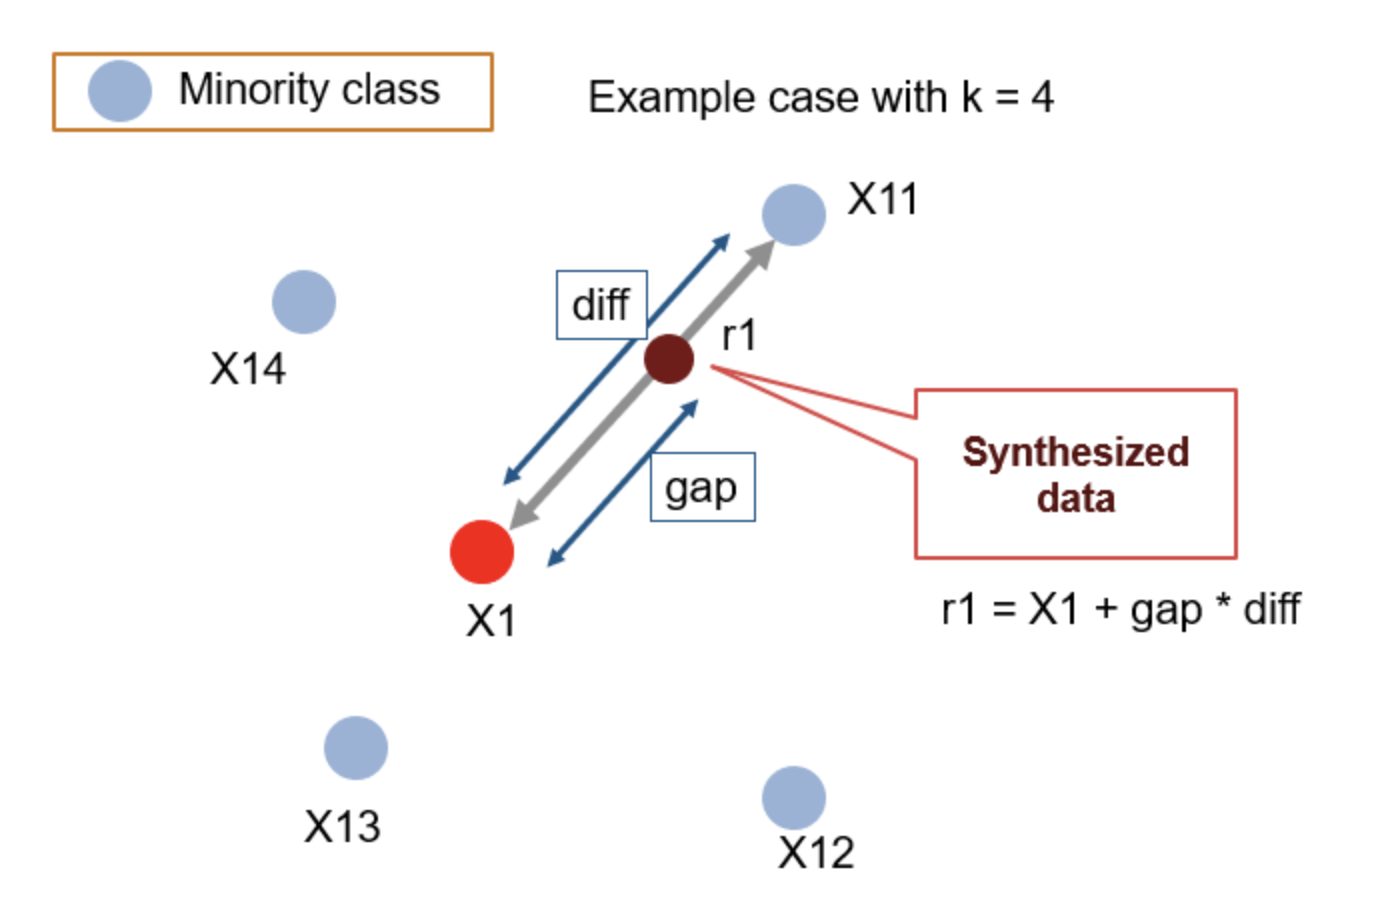

In [ ]:
data1 = df1.copy(deep=True)

In [ ]:
# Get rid of the row column, and the Final IG label. 

all_features = df1.drop(axis=1, labels =["ROW", "Final_IG", "Period"])
all_targets = all_features.pop("B_PLUS_FLAG")

# Generate Synthetic Data using SMOTE
smote = SMOTE(random_state=123)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(all_features, all_targets)
# Added approx. 10k more training examples! (for fruadulent rows)
print('Original target variable shape', Counter(all_targets))
print('Resample target variable shape', Counter(y_smote))

df_sm = df_sm = x_smote.copy()
df_sm['Y'] = y_smote

## ADASYN: Adaptive Synthetic Sampling Approach

In [ ]:
# Get rid of the row column, and the Final IG label. 
all_features = df1.drop(axis=1, labels =["ROW", "Final_IG", "Period"])
all_targets = all_features.pop("B_PLUS_FLAG")

print('Original target variable shape', Counter(all_targets))
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=123)
X_train_ada, y_train_ada = ada.fit_resample(all_features, all_targets)

counter = Counter(y_train_ada)
print('Resample target variable shape', Counter(y_train_ada))

df_ada = X_train_ada.copy()
df_ada['Y'] = y_train_ada

## SMOTE + TOMEK Links

(Oversampling & then adding Tomek links  --> Removes samples near/overlaping the boundaries)

In [ ]:
# Get rid of the row column, and the Final IG label. 
all_features = df1.drop(axis=1, labels =["ROW", "Final_IG", "Period"])
all_targets = all_features.pop("B_PLUS_FLAG")

counter = Counter(all_targets)
print('Original target variable shape',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=123)
X_train_smtom, y_train_smtom = smtom.fit_resample(all_features, all_targets)

counter = Counter(y_train_smtom)
print('Resample target variable shape',counter)

df_smtom = X_train_smtom.copy()
df_smtom['Y'] = y_train_smtom

## SMOTE + ENN

In [ ]:
# Get rid of the row column, and the Final IG label. 
all_features = df1.drop(axis=1, labels =["ROW", "Final_IG", "Period"])
all_targets = all_features.pop("B_PLUS_FLAG")

counter = Counter(all_targets)
print('Original target variable shape',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(all_features, all_targets)

counter = Counter(y_train_smenn)
print('Resample target variable shape',counter)

df_smenn = X_train_smenn.copy()
df_smenn['Y'] = y_train_smenn

## Visualization

In [ ]:
f, axes = plt.subplots(2,2,figsize=(15, 10), dpi=300)
sns.despine()
sns.scatterplot(x="Ebitda_Margin_Y0", y='Ebitda_Margin_Y1', hue = 'Y', data=df_sm, ax=axes[0,0])
axes[0,0].set_title('Resampling with SMOTE', fontsize=14)
sns.scatterplot(x="Ebitda_Margin_Y0", y='Ebitda_Margin_Y1', hue = 'Y', data=df_ada, ax=axes[0,1])
axes[0,1].set_title('Resampling with ADASYN', fontsize=14)
sns.scatterplot(x="Ebitda_Margin_Y0", y='Ebitda_Margin_Y1', hue = 'Y', data=df_smtom, ax=axes[1,0])
axes[1,0].set_title('Resampling with SMOTE + Tomek Links', fontsize=14)
sns.scatterplot(x="Ebitda_Margin_Y0", y='Ebitda_Margin_Y1', hue = 'Y', data=df_smenn, ax=axes[1,1])
axes[1,1].set_title('Resampling with SMOTE + ENN', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

## Finding out the BEST imbalance technique

In [ ]:
def resample_df(x_train, y_train, method, num_nieghbours):

  if method == "SMOTE":
    # Generate Synthetic Data using SMOTE
    smote = SMOTE(random_state=123, k_neighbors = num_nieghbours)
    X, y = smote.fit_resample(x_train, y_train)
  
  if method == "ADASNYA":
    # Generate synthetic data using ADASNYA
    ada = ADASYN(random_state=123, n_neighbors=num_nieghbours)
    X, y = ada.fit_resample(x_train, y_train)
    
  if method == "SMOTE_TOMEK":
    # Generate synthetic data using SMOTE + Tomek Links
    smtom = SMOTETomek(random_state=123)
    X, y = smtom.fit_resample(x_train, y_train)

  if method == "SMOTE_ENN":
    # Generate synthetic data using SMOTE & ENN 
    smenn = SMOTEENN()
    X, Y = smenn.fit_resample(x_train, y_train)
    
  else: 
    X,y = x_train, y_train

  return X,y

In [ ]:
# Modify our run_base_models() function to also take into account re-sampling
def synthetic_data_base_models(data, re_sampling_method, num_of_nieghbours=5):
  """
  Data needs to be FULL data (Including all of our variables)
  Resampleing methods can be: "SMOTE", "ADASNYA", "SMOTE_TOMEK", "SMOTE_ENN"
  num_of_nieghbours: How many nieghbours to look at when creating synthetic data (only SMOTE & ADASYN use this)
  """
  
  # Get rid of the row column, and the Final IG label. 
  all_features = data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
  all_targets = all_features.pop("B_PLUS_FLAG")
  train_features , test_features, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.2)
  
  # Re-Sample data based on method provided
  # We only re-sample the training section & don't touch the test section. 
  train_features, train_targets = resample_df(train_features, train_targets, method=re_sampling_method, num_nieghbours=num_of_nieghbours)

  # Initialize all models in a list
  models = [LogisticRegression(),
            DecisionTreeClassifier(max_depth=8),
            ]
  # Define all the model names
  model_names = ["Logistic Regression",
                 "Decision Tree",
                ]
  # Print the data size
  print("Training Data size: {}".format(train_features.shape))

  # Loop over models instead of having separate cell per model
  for name, model in zip(model_names, models):
      # Training and model accuracy
      model.random_state = 0
      print("Training Model :  {}".format(name))
      model.fit(train_features, train_targets)
      print("Done Training {}".format(name))
      test_score = model.score(test_features, test_targets) * 100
      train_score = model.score(train_features, train_targets) * 100

      # Predict Y values and see the TP, FP, et c(Using confusion matrix)
      y_pred = model.predict(test_features) # removed the predict.probabilities
      precision, recall, thresholds = metrics.precision_recall_curve(test_targets, y_pred)
      pr_auc = metrics.auc(recall, precision)
      f1score = f1_score(test_targets, y_pred)
      CM = confusion_matrix(test_targets, y_pred)
      TN, FN, TP, FP = CM[0][0], CM[1][0],  CM[1][1], CM[0][1]
      print("{} Train Score : {}".format(name, train_score))
      print("{} Test Score : {}".format(name, test_score))
      print("PR-AUC: {}".format(pr_auc))
      print("F1-Score: {}".format(f1score))
      print("# of False Positives: {}".format(FP))
      print("# of True Positives: {}".format(TP))
      print("# of False Negatives: {}".format(FN))
      print("~"*50)
      print("Model Done")
      print("~"*50)
      
  return None

In [ ]:
data = df1.copy(deep=True)
data = Standardize(data, method="Normalization")
print("ORIGINAL DATASET RESULTS")
synthetic_data_base_models(data, re_sampling_method="", num_of_nieghbours=0)

In [ ]:
data = df1.copy(deep=True)
data = Standardize(data, method="Normalization")
print("SMOTE DATASET RESULTS")
synthetic_data_base_models(data, re_sampling_method="SMOTE", num_of_nieghbours=5)

In [ ]:
data = df1.copy(deep=True)
data = Standardize(data, method="Normalization")
print("ADASNYA DATASET RESULTS")
synthetic_data_base_models(data, re_sampling_method="ADASNYA", num_of_nieghbours=5)

In [ ]:
# Get rid of the row column, and the Final IG label. 

data = Standardize(df1, method="Normalize")
all_features = data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
all_targets = all_features.pop("B_PLUS_FLAG")
train_features , test_features, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.2)

# Generate Synthetic Data using SMOTE
ada = ADASYN(random_state=130, n_neighbors=5)
X_train_ada, y_train_ada = ada.fit_resample(all_features, all_targets)
train_features, train_targets = X_train_ada, y_train_ada

# Initialize all models in a list
models = [LogisticRegression(),
          DecisionTreeClassifier(max_depth=8),
          RandomForestClassifier(max_depth=12, n_estimators=100),
         ]
# Define all the model names
model_names = ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
              ]
# Print the data size
print("ADASNYA DATASET RESULTS")
print("Training Data size: {}".format(train_features.shape))

# Loop over models instead of having separate cell per model
for name, model in zip(model_names, models):
    # Training and model accuracy
    model.random_state = 0
    print("Training Model :  {}".format(name))
    model.fit(train_features, train_targets)
    print("Done Training {}".format(name))
    test_score = model.score(test_features, test_targets) * 100
    train_score = model.score(train_features, train_targets) * 100
    
    # Predict Y values and see the TP, FP, et c(Using confusion matrix)
    y_pred = model.predict(test_features) # removed the predict.probabilities
    precision, recall, thresholds = metrics.precision_recall_curve(test_targets, y_pred)
    pr_auc = metrics.auc(recall, precision)
    f1score = f1_score(test_targets, y_pred)
    CM = confusion_matrix(test_targets, y_pred)
    TN, FN, TP, FP = CM[0][0], CM[1][0],  CM[1][1], CM[0][1]
    print("{} Train Score : {}".format(name, train_score))
    print("{} Test Score : {}".format(name, test_score))
    print("PR-AUC: {}".format(pr_auc))
    print("F1-Score: {}".format(f1score))
    print("# of False Positives: {}".format(FP))
    print("# of True Positives: {}".format(TP))
    print("# of False Negatives: {}".format(FN))
    print("~"*50)
    print("Model Done")
    print("~"*50)

print("*"*50)    
print("~"*50)
print("ALL MODELS DONE")
print("~"*50)
print("*"*50)

**Neural Network**
The following code uses the Keras Sequential model to generate a neural network with 4 dense layers. The final layer uses a sigmoid activation to squeeze values between 0 and 1.

In [ ]:
#Packages/Methods needed for a Neural Network Model
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
import random as python_random

In [ ]:
def set_seed():
  """ For a Keras model, a seed must be set to generate random number in a well-defined initial state. 
  This function will set the initial seed for numpy, python, and TensorFlow backend operations to a set value.

  Numpy: Set the seed for Numpy, default = 0
  Python: Set the seed for PYTHONHASHSEED, default = 0
  TensorFlow: Set the seed for TensorFlow backend operations, default = 0
  
  For more details, visit Keras documentation:
  https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
  """
  np.random.seed(0)
  python_random.seed(0)
  tf.random.set_seed(0)
  return

In [ ]:
#Set the seed to obtain reproducible results
set_seed()

# create scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

#Collect the data
dataset_NN = data
dataset_NN = dataset_NN.fillna(dataset_NN.median())
# dataset_NN = dataset_NN.drop(KMeans_outliers, axis=0)

print(dataset_NN['Final_IG'].value_counts(ascending=True))

#Preprocess for the Neural Network
features_to_drop = ["ROW",'Date','Year','Month']
dataset_NN.drop(features_to_drop,axis=1,inplace=True)

x_NN = dataset_NN.drop(axis=1, labels =["B_PLUS_FLAG"])
y_NN = x_NN.pop("Final_IG")

standardized_x_NN = scaler.fit_transform(x_NN)
#Split the data into training and test sets
split = 0.8
split_value = math.ceil(len(x_NN)*split)
x_NN_train, x_NN_test = standardized_x_NN[split_value:], standardized_x_NN[:split_value]
y_NN_train, y_NN_test = y_NN[split_value:], y_NN[:split_value]

print(y_NN_train)
ada = ADASYN(random_state=123,n_neighbors=2,sampling_strategy='minority')
x_NN_train, y_NN_train = ada.fit_resample(x_NN_train, y_NN_train)

x_array_train, x_array_test = np.asarray(x_NN_train).astype('float32'), np.asarray(x_NN_test).astype('float32')
y_array_train, y_array_test = np.asarray(y_NN_train).astype('float32'), np.asarray(y_NN_test).astype('float32')

# define the keras model
model = Sequential()
model.add(Dense(30, input_dim=len(x_NN.columns), activation='relu'))
model.add(Dense(18, activation='sigmoid'))
# model.add(Flatten())

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##In Keras, the multi-class log loss is defined as the cross entropy. A sparse categorical cross entropy is used as it places a constraint that the final outcome is an integer.

# fit the keras model on the dataset
model.fit(x_array_train, y_array_train, epochs=150, batch_size=10, callbacks=[callback])
# # evaluate the keras model
_, accuracy = model.evaluate(x_NN_test, y_NN_test)
print('Accuracy: %.2f' % (accuracy*100))

# Task 1 FINAL Submission



Please see at the bottom of the following notebook: https://colab.research.google.com/drive/12-WoDlpAyI1EFaKZ8MMYqq6VqO2LqkxE#scrollTo=s6jNF47uJWPg

# TASK 2 FINAL SUBMISSION 

Please see at the bottom of the following notebook: https://colab.research.google.com/drive/1tBv1SWpnbOqn82i2G-w3US-VB81pm5KF#scrollTo=vh2wX7k-NtG9
